In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
from datetime import datetime

pd.options.display.max_columns=100

df_train = pd.read_csv('/content/drive/MyDrive/walmart-sales-forecast/train.csv')

df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


###Limpieza de datos:
- Verificar valores nulos.
- Reemplazar o eliminar los valores nulos.
- Convertir las columnas con tipos de datos incorrectos, por ejemplo, convertir fechas de texto a objetos `datetime`.

In [5]:
print("\nValores nulos en Train:")
print(df_train.isnull().sum())


Valores nulos en Train:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


In [8]:
df_train.fillna(0, inplace=True)  # Reemplazar nulos con 0

In [12]:
df_train["Date"] = pd.to_datetime(df_train["Date"])

print(df_train.dtypes)

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object


###Preparación:
- Crear nuevas variables a partir de las fechas, como día de la semana o del año.
- Filtrar el dataset para seleccionar solo ciertas categorías de productos.

In [14]:
df_train["Year"] = df_train["Date"].dt.year
df_train["Month"] = df_train["Date"].dt.month
df_train["Day"] = df_train["Date"].dt.day
df_train["DayOfWeek"] = df_train["Date"].dt.dayofweek

df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Day,DayOfWeek
0,1,1,2010-02-05,24924.50,False,2010,2,5,4
1,1,1,2010-02-12,46039.49,True,2010,2,12,4
2,1,1,2010-02-19,41595.55,False,2010,2,19,4
3,1,1,2010-02-26,19403.54,False,2010,2,26,4
4,1,1,2010-03-05,21827.90,False,2010,3,5,4


###Análisis Exploratorio:

- Mostrar un resumen estadístico de las ventas.
- Visualizar las ventas a lo largo del tiempo utilizando `matplotlib` o `seaborn`.

In [15]:
print(df_train.describe())

               Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375104   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales           Year          Month            Day  DayOfWeek  
count  421570.000000  421570.000000  421570.000000  421570.000000   421570.0  
mean    15981.258123    2010.968591       6.449510      15.673131        4.0  
min     -4988.940000    2010.000000       1.000000       1.000000        4.0  
25%      2079.650000    2010.000000       4.000000   

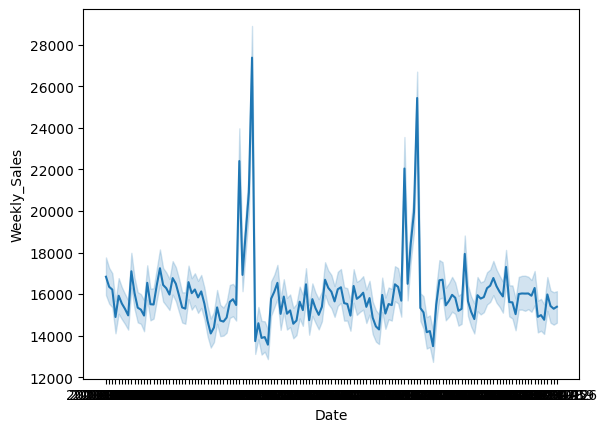

In [19]:
sns.lineplot(x="Date", y="Weekly_Sales", data=df_train)
plt.show()